In [1]:
## Standard Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

In [2]:
df1 = pd.read_csv('superhero_info - superhero_info.csv')
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"


In [3]:
df1['Hero|Publisher'] = df1['Hero|Publisher'].str.replace('|', ',', regex = False)
df1['Hero|Publisher']

0               A-Bomb,Marvel Comics
1       Abe Sapien,Dark Horse Comics
2                 Abin Sur,DC Comics
3          Abomination,Marvel Comics
4        Absorbing Man,Marvel Comics
                   ...              
458       Yellowjacket,Marvel Comics
459    Yellowjacket II,Marvel Comics
460                Yoda,George Lucas
461                Zatanna,DC Comics
462                   Zoom,DC Comics
Name: Hero|Publisher, Length: 463, dtype: object

In [7]:
df1[['Hero', 'Publisher']] = df1['Hero|Publisher'].str.split(',', expand = True)
df1.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,"A-Bomb,Marvel Comics",Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,"Abe Sapien,Dark Horse Comics",Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,"Abin Sur,DC Comics",Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,"Abomination,Marvel Comics",Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,"Absorbing Man,Marvel Comics",Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [8]:
df1 = df1.drop(columns = ['Hero|Publisher'])
df1

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics
...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,"{'Height': '183.0 cm', 'Weight': '83.0 kg'}",Yellowjacket,Marvel Comics
459,Female,Human,good,Strawberry Blond,blue,Unknown,"{'Height': '165.0 cm', 'Weight': '52.0 kg'}",Yellowjacket II,Marvel Comics
460,Male,Yoda's species,good,White,brown,green,"{'Height': '66.0 cm', 'Weight': '17.0 kg'}",Yoda,George Lucas
461,Female,Human,good,Black,blue,Unknown,"{'Height': '170.0 cm', 'Weight': '57.0 kg'}",Zatanna,DC Comics


In [10]:
# replace to double quotes
df1['Measurements'] = df1['Measurements'].str.replace("'",'"')
df1['Measurements']

0      {"Height": "203.0 cm", "Weight": "441.0 kg"}
1       {"Height": "191.0 cm", "Weight": "65.0 kg"}
2       {"Height": "185.0 cm", "Weight": "90.0 kg"}
3      {"Height": "203.0 cm", "Weight": "441.0 kg"}
4      {"Height": "193.0 cm", "Weight": "122.0 kg"}
                           ...                     
458     {"Height": "183.0 cm", "Weight": "83.0 kg"}
459     {"Height": "165.0 cm", "Weight": "52.0 kg"}
460      {"Height": "66.0 cm", "Weight": "17.0 kg"}
461     {"Height": "170.0 cm", "Weight": "57.0 kg"}
462     {"Height": "185.0 cm", "Weight": "81.0 kg"}
Name: Measurements, Length: 463, dtype: object

In [11]:
df1['Measurements'] = df1['Measurements'].apply(json.loads)
df1['Measurements'].dtype

dtype('O')

In [12]:
df1.loc[0, 'Measurements']

{'Height': '203.0 cm', 'Weight': '441.0 kg'}

In [13]:
# now that we have an actual dictionary, we can unpack it into seperate columns
height_weight = df1['Measurements'].apply(pd.Series)
height_weight

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [14]:
# now add these columns to the df1 
df1 = pd.concat((df1, height_weight), axis = 1)
df1.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [15]:
# drop measurements
df1 = df1.drop(columns = 'Measurements')
df1.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0 cm,90.0 kg
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0 cm,441.0 kg
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0 cm,122.0 kg


In [16]:
# now we need to make height and weight numeric, so we have to remove the units and the space 
df1['Height'] = df1['Height'].str.replace(' cm', '')
df1['Weight'] = df1['Weight'].str.replace(' kg', '')

In [21]:
# convert height and weight to numeric 
df1['Height'] = pd.to_numeric(df1['Height']) 
df1['Weight'] = pd.to_numeric(df1['Weight']) 

In [27]:
# Check dtypes
df1.dtypes

Gender         object
Race           object
Alignment      object
Hair color     object
Eye color      object
Skin color     object
Hero           object
Publisher      object
Height        float64
Weight        float64
dtype: object

---

In [28]:
df2 = pd.read_csv('superhero_powers - superhero_powers.csv')
df2.info()
df2.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."


In [34]:
df2['powers_split'] = df2['Powers'].str.split(',')
df2['powers_split'].head(2)

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
Name: powers_split, dtype: object

In [35]:
exploded = df2.explode('powers_split')
exploded.head()

,hero_names,Powers,powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing


In [38]:
cols = exploded['powers_split'].dropna().unique()
cols

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [40]:
for col in cols:
    df2[col] = df2['Powers'].str.contains(col)
df2.head()

C:\Users\JOSH\AppData\Local\Temp\ipykernel_17812\163549704.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\JOSH\AppData\Local\Temp\ipykernel_17812\163549704.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df2[col] = df2['Powers'].str.contains(col)
C:\Users\JOSH\AppData\Local\Temp\ipykernel_17812\163549704.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

,hero_names,Powers,powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
# merge two dfs 
merged = pd.merge(df1, df2, left_on = 'Hero', right_on = 'hero_names')
merged.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


In [50]:
avg_weight_super_speed = merged.groupby('Super Speed')['Weight'].mean()
avg_weight_super_speed

Super Speed
False    101.773585
True     129.404040
Name: Weight, dtype: float64

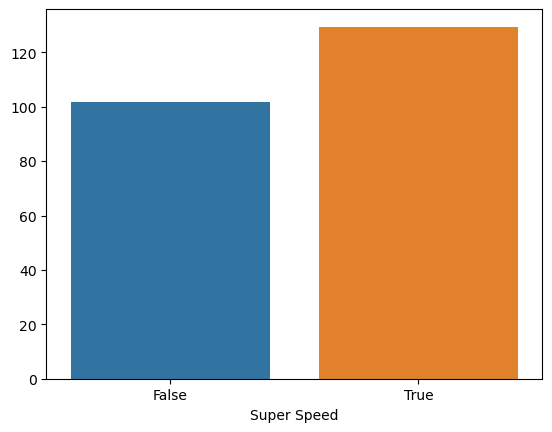

In [66]:
ax = sns.barplot(x = avg_weight_super_speed.index, y = avg_weight_super_speed.values);

In [58]:
avg_height_per_publisher = merged.groupby('Publisher')['Height'].mean().sort_values(ascending = False)
avg_height_per_publisher

Publisher
Image Comics         211.000000
Marvel Comics        191.546128
DC Comics            181.923913
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Dark Horse Comics    176.909091
Shueisha             171.500000
George Lucas         159.600000
Name: Height, dtype: float64

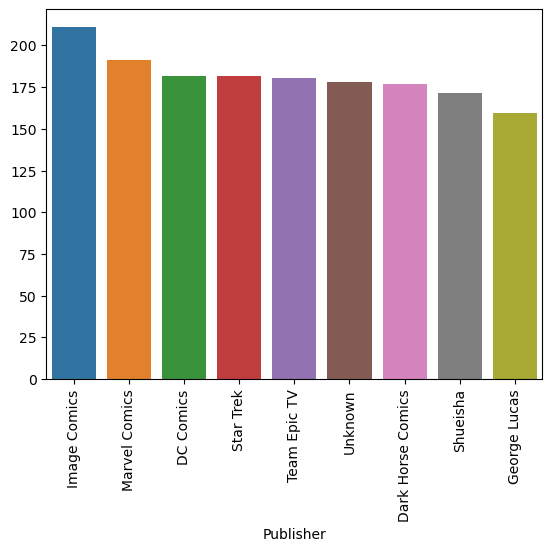

In [64]:
ax = sns.barplot(x = avg_height_per_publisher.index, y = avg_height_per_publisher.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);